<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    RNN, LSTM and GRU Multilabeld Classification
</div>



In [45]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import LSTM, Dense, GRU
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/datasets/toxic-comments.csv')

In [47]:
df.shape

(159571, 8)

In [48]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [49]:
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [50]:
comments = df.sum(numeric_only=True)

([<matplotlib.patches.Wedge at 0x7ceffcabea70>,
 [Text(0.2205229793508023, 1.0776686019265134, 'toxic'),
  Text(-1.0627685713534702, 0.28376568457673707, 'severe_toxic'),
  Text(-0.88354481837012, -0.655246941184247, 'obscene'),
  Text(-0.1465638198299719, -1.0901922063181555, 'threat'),
  Text(0.6339460365091164, -0.8989507343533251, 'insult'),
  Text(1.0913128295372536, -0.1379721279367442, 'identity_hate')],
 [Text(0.12028526146407398, 0.5878192374144617, '43.58%'),
  Text(-0.5796919480109837, 0.15478128249640202, '4.54%'),
  Text(-0.48193353729279265, -0.35740742246413465, '24.07%'),
  Text(-0.0799439017254392, -0.5946502943553574, '1.36%'),
  Text(0.3457887471867907, -0.49033676419272265, '22.44%'),
  Text(0.5952615433839564, -0.0752575243291332, '4.00%')])

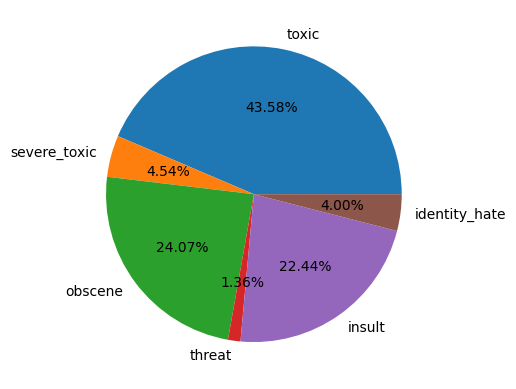

In [51]:
plt.pie(
    comments.values,
    labels=comments.index,
    autopct='%2.2f%%'
)

In [52]:
# Neutral which do naot have any negative reiews
neutral = df.sum(axis=1, numeric_only=True)
sum(neutral==0)

143346

$$\text{
Data Cleaning
}$$

In [53]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]+', ' ',text)
    return text

In [54]:
df['comment_text'] = df['comment_text'].apply(clean_text)

$$\text{
Seperate dependent and Independent varuables
}$$

In [55]:
X = df['comment_text']
y = df[toxicities].values

In [56]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

$$\text{
Data Preparation
}$$

In [57]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=200)

In [58]:
padded_sequences.shape

(159571, 200)

$$\text{
Train Test Split
}$$

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    y,
    test_size=0.2,
    random_state=0
)

In [60]:
import gc
gc.collect()
gc.collect()

0

In [61]:
model = Sequential()
model.add(Embedding(5000, 128, input_length = 200))
model.add(GRU(64))
model.add(Dense(6, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [64]:
model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.9681 - loss: 0.0982 - val_accuracy: 0.9925 - val_loss: 0.0521
Epoch 2/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.9905 - loss: 0.0462 - val_accuracy: 0.9905 - val_loss: 0.0482
Epoch 3/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9808 - loss: 0.0402 - val_accuracy: 0.9540 - val_loss: 0.0488


In [65]:
def predict_toxicity(text):
    text1 = clean_text(text)
    sequences = tokenizer.texts_to_sequences(text1)
    padded_sequences = pad_sequences(sequences, maxlen=200)
    prediction = model.predict(padded_sequences, verbose = False)
    return prediction[0]

In [66]:
text1 = 'You are waste of space. World is bwtter without you.'
text2 = 'You life will be so beautiful without her.'
text3 = 'You are stupid. No one cares about your opinion. Just shut up'

In [70]:
for text in [text1, text2, text3]:
    print(text)
    prediction = predict_toxicity(text1)
    for toxicity, prob in zip(toxicities, prediction):
        print(toxicity, '-->', prob)

You are waste of space. World is bwtter without you.
toxic --> 0.028755514
severe_toxic --> 0.0022653285
obscene --> 0.01763963
threat --> 0.00012604537
insult --> 0.031925436
identity_hate --> 0.0003058547
You life will be so beautiful without her.
toxic --> 0.028755514
severe_toxic --> 0.0022653285
obscene --> 0.01763963
threat --> 0.00012604537
insult --> 0.031925436
identity_hate --> 0.0003058547
You are stupid. No one cares about your opinion. Just shut up
toxic --> 0.028755514
severe_toxic --> 0.0022653285
obscene --> 0.01763963
threat --> 0.00012604537
insult --> 0.031925436
identity_hate --> 0.0003058547
